In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

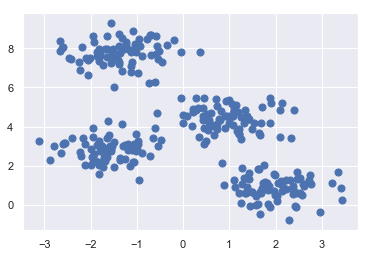

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state =0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

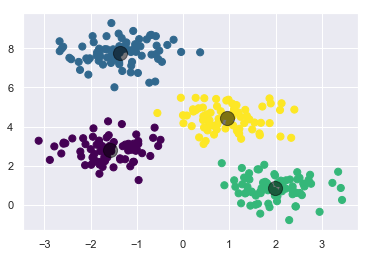

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

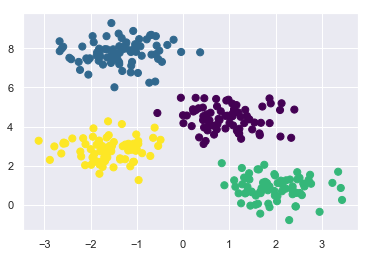

In [7]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

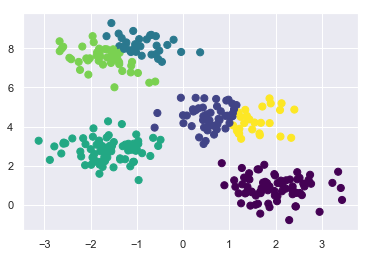

In [12]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:,0], X[:, 1], c=labels, s=50, cmap='viridis')

In [15]:
from sklearn.datasets import make_moons
X, y = make_moons(500, noise=.05, random_state=0)

In [16]:
labels = KMeans(2, random_state=0).fit_predict(X)

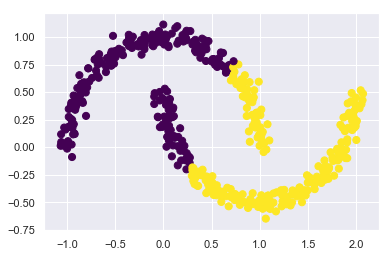

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [26]:
import numpy as np
import scipy as sp
import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import KMeans, AgglomerativeClustering

try:
    from scipy.misc import face
    face = face(gray = True)
except ImportError:
    face = sp.face(gray=True)
        

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


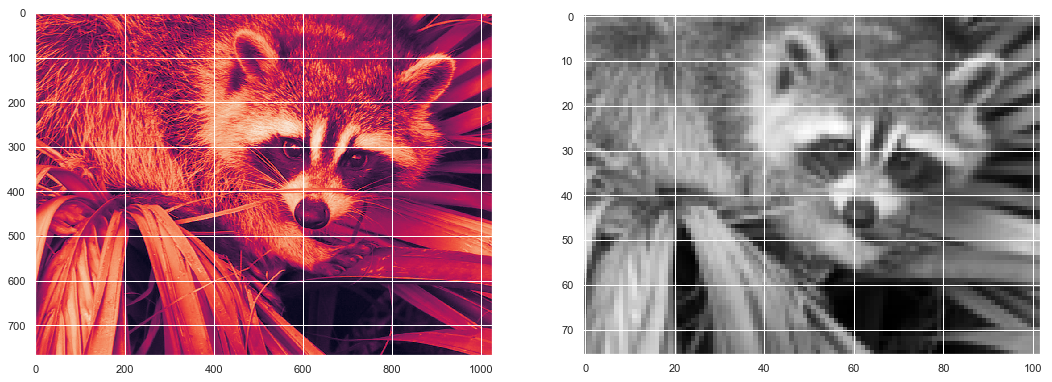

In [27]:
fig, axes = plt.subplots(1,2, figsize=(18,8))
axes[0].imshow(face)

face = sp.misc.imresize(face, 0.10) / 255.
axes[1].imshow(face, cmap='gray')

In [33]:
x =np.reshape(face, (-1, 1))

connectivity = grid_to_graph(*face.shape)

print("*Compute structured hierarchical clustering..")
st = time.time()
n_cluster = 15
ward = AgglomerativeClustering(n_clusters=n_cluster, linkage='ward',
                              connectivity=connectivity)
ward.fit(x)
label = np.reshape(ward.labels_, face.shape)

print ("Elapsed time: ", time.time(), face.shape)
print ("Number of pixels: ", label.size)
print ("Number of clusters: ", np.unique(label).size)

*Compute structured hierarchical clustering..
Elapsed time:  1532066697.5098052 (76, 102)
Number of pixels:  7752
Number of clusters:  15


C:\Users\user\AppData\Roaming\Python\Python36\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


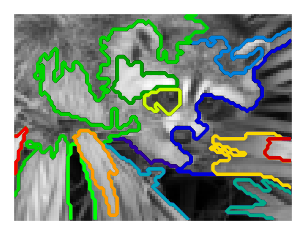

In [36]:
plt.figure(figsize=(5,5))
plt.imshow(face, cmap=plt.cm.gray)
for l in range(n_cluster):
    plt.contour(label == l, contours=1, colors=[plt.cm.nipy_spectral(l / float(n_cluster)), ])

plt.xticks(())
plt.yticks(())
plt.show()

In [38]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255.

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

In [40]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블: {}".format(np.unique(labels)))

고유한 레이블: [-1]
